### 使用梯度上升法实现PCA

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

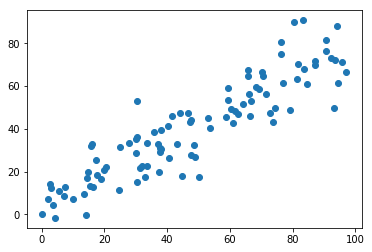

In [16]:
plt.scatter(X[:, 0], X[:, 1])

### demean

In [17]:
def demean(X):
    return X - np.mean(X, axis=0)

In [21]:
X

array([[47.5142543 , 27.76986478],
       [15.84141577, 32.00413375],
       [13.39190257,  9.36977492],
       [ 2.00392229,  7.18323717],
       [65.92330328, 67.45677358],
       [66.67280908, 53.15438105],
       [ 7.61481996, 12.68019579],
       [37.06288022, 32.69999673],
       [19.95620199, 20.6181564 ],
       [31.45578973, 21.51255616],
       [77.05758525, 61.60767718],
       [32.9842049 , 17.66416605],
       [30.17763015, 28.70923358],
       [80.60983666, 90.11189532],
       [66.41189107, 45.81084822],
       [ 5.4927795 , 10.99824501],
       [79.16485631, 48.77883568],
       [32.1319614 , 22.51712389],
       [16.53608586, 12.88581358],
       [ 2.83514098, 14.17326901],
       [50.23630611, 17.61075426],
       [60.36635377, 49.10935915],
       [53.60464603, 40.18097996],
       [15.55437052, 13.11782335],
       [40.41928931, 41.23452027],
       [ 9.92947759,  6.9509051 ],
       [30.41806538, 15.01629502],
       [64.15801608, 51.57562808],
       [47.52428503,

In [19]:
np.mean(X, axis=0)

array([48.25402236, 40.58812787])

In [20]:
X - np.mean(X, axis=0)

array([[ -0.73976807, -12.8182631 ],
       [-32.4126066 ,  -8.58399413],
       [-34.86211979, -31.21835295],
       [-46.25010007, -33.4048907 ],
       [ 17.66928091,  26.86864571],
       [ 18.41878672,  12.56625317],
       [-40.63920241, -27.90793208],
       [-11.19114214,  -7.88813115],
       [-28.29782037, -19.96997148],
       [-16.79823264, -19.07557172],
       [ 28.80356289,  21.01954931],
       [-15.26981746, -22.92396182],
       [-18.07639222, -11.8788943 ],
       [ 32.35581429,  49.52376744],
       [ 18.15786871,   5.22272035],
       [-42.76124286, -29.58988286],
       [ 30.91083394,   8.19070781],
       [-16.12206097, -18.07100399],
       [-31.7179365 , -27.70231429],
       [-45.41888139, -26.41485886],
       [  1.98228375, -22.97737361],
       [ 12.1123314 ,   8.52123127],
       [  5.35062367,  -0.40714791],
       [-32.69965184, -27.47030452],
       [ -7.83473305,   0.6463924 ],
       [-38.32454478, -33.63722277],
       [-17.83595698, -25.57183285],
 

In [22]:
X_demean = demean(X)

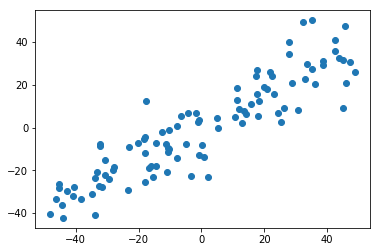

In [23]:
plt.scatter(X_demean[:,0], X_demean[:,1])

In [24]:
np.mean(X_demean[:,0])

-1.6484591469634323e-14

In [25]:
np.mean(X_demean[:,1])

-8.171241461241152e-15

### 梯度上升法

In [27]:
def f(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)

In [28]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [29]:
def df_debug(w, X, epsilon = 0.0001):
    res  = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [31]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意1： 每次求一个单位向量
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [32]:
initial_w = np.random.random(X.shape[1]) # 注意2： 不能用0向量开始
initial_w

array([0.93699139, 0.18197182])

In [33]:
eta = 0.001

In [34]:
# 注意3： 不能使用StandardScaler标准化数据

In [35]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77925815, 0.62670307])

In [38]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.77925815, 0.62670307])

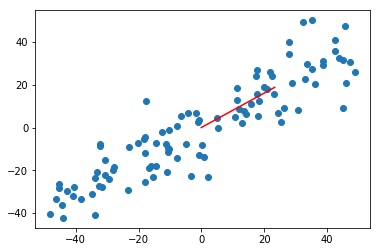

In [39]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color = 'r')

### 使用极端数据集测试

In [40]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

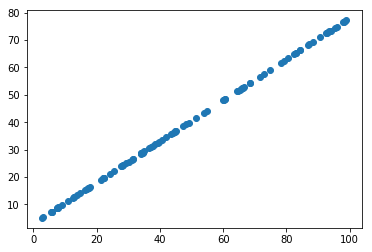

In [41]:
plt.scatter(X2[:,0], X2[:,1])

In [42]:
X2_demean = demean(X2)

In [43]:
gradient_ascent(df_math, X2_demean, initial_w, eta)

array([0.80000019, 0.59999974])

In [44]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

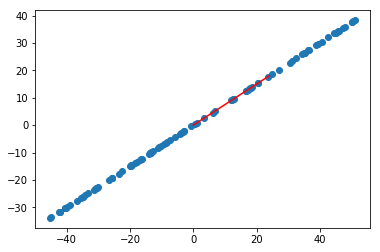

In [45]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')